# Regularized Linear Regression(Ridge regression) and Validation

### 線性回歸也是一個很基本的算法，透過X和y的計算，可以直接算出回歸直線的向量：
$$W_{Lin} = (X^{T}X)^{-1}X^{T}y$$
### 而這裡使用的Error func. 是sqr Error：
$$err_{sqr} = (W^{T}X - y)^{2}$$
### 如果要同時考慮到抑制overfitting的發生，我們這裡使用常見的L2 regularizer，所以整個求最佳W 的問題就變成 : 
### $$ argmin_{w} \ E_{aug} = argmin_{w}E_{in}(w)+(\lambda/N)W^{T}W$$
### 這時候 $$W_{Reg} \leftarrow (X^{T}X+\lambda I)^{-1}Z^{T}y$$
### 另外，當我們在訓練data的時候，因為可能會有overfitting的發生，因此一昧的降低$E_{in}$並不能真正的達到預測的效果，但我們也不能直接將要預測的data，也就是test data拿來訓練，因為這樣一來，你的模型裡就會隱含有test data的資訊，而test data 也不再是一個“乾淨”的data。因此，我們習慣在training samples裡面，分出一小部分當作validation samples，將一部份的samples留著當作驗證的資料，而不納入訓練之中，並同時將$E_{in}$和$E_{val}$都盡可能地降低，這樣一來，在test samples上的表現，通常也會比較好。

### 我們這邊一樣實際使用 Regularized Ridger regression 在data上：

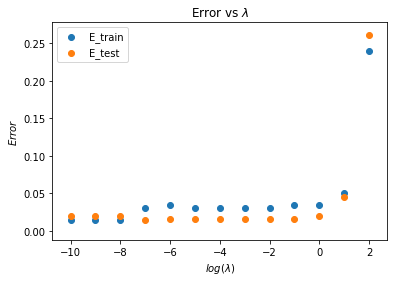

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

w_ = np.linspace(-10,2,13)

log_lamd = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2]
X_train = np.genfromtxt("/Users/huangyuchen/Desktop/ML_NTU/hw4_train.dat.txt")
X_test = np.genfromtxt("/Users/huangyuchen/Desktop/ML_NTU/hw4_test.dat.txt")
y_train = np.reshape(X_train[:,-1],(-1,1))
y_test = np.reshape(X_test[:,-1],(-1,1))
## Adding bias terms on both X_train and X_test
X_train = np.insert(X_train,0,1,1)
X_test = np.insert(X_test,0,1,1)


def Ridge_reg(X,y,lamb):
    m,n = X.shape
    WLin = (inv((X.T).dot(X)+lamb*np.eye(n)).dot(X.T)).dot(y)
    return WLin

ytrval = []
yteval = []
for i in log_lamd:
    w = Ridge_reg(X_train[:,:-1],y_train,10**i)
    resultr = np.mean(np.sign(X_train[:,:-1].dot(w))!= y_train)
    resulte = np.mean(np.sign(X_test[:,:-1].dot(w))!= y_test)
    ytrval.append(resultr)
    yteval.append(resulte)
    
fig = plt.figure()
ax = plt.axes()
ax.scatter(w_, ytrval)
ax.scatter(w_, yteval)
ax.legend(['E_train','E_test'])
plt.title('Error vs $\lambda$')
plt.ylabel("$Error$ ")
plt.xlabel("$log(\lambda)$")
plt.show()

### 我們將Error對$log(\lambda)$作圖，發現當$log(\lambda)$很小的時候，$E_{in}$和$E_{out}$都相當低。因為當$log(\lambda)$很小時，$E_{aug}$就會比較著重在將$E_{in}(w)$做得越小越好，這時候得到的結果應該會和沒有加上regularized term的結果相近。但適當$log(\lambda)$變大時，$E_{aug}$就會著重在將$W^{T}W$做得越小越好。所以藉由調整$\lambda$，這其實是一個 trade-off between Error and Regularized。

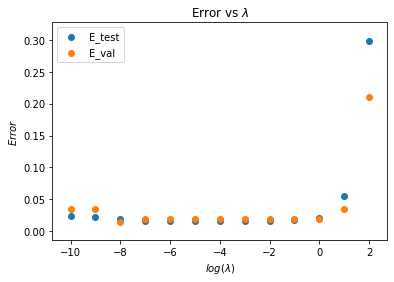

In [20]:
yteval = []
yval = []
for i in log_lamd:
    resultv = 0
    bot = 0
    upp = 40 
    for l in range(4):
        
        X = np.delete(X_train[:,:-1],np.s_[bot:upp],axis = 0)
        y = np.reshape(np.delete(X_train[:,-1],np.s_[bot:upp],axis = 0),(-1,1))
        w = Ridge_reg(X,y,10**i)      
        y_val = np.reshape(X_train[bot:upp,-1],(-1,1))
        resultv += np.mean(np.sign(X_train[bot:upp,:-1].dot(w))!= y_val)
        bot = bot + 40
        upp = upp + 40
        
    yval.append(resultv/5)   
    resulte = np.mean(np.sign(X_test[:,:-1].dot(w))!= y_test)
    yteval.append(resulte)
    
fig = plt.figure()
ax = plt.axes()
ax.scatter(w_, yteval)
ax.scatter(w_, yval)
ax.legend(['E_test','E_val'])
plt.title('Error vs $\lambda$')
plt.ylabel("$Error$ ")
plt.xlabel("$log(\lambda)$")
plt.show()

### 由上圖可以看到，Validation samples某種程度上可以代表$E_{out}$隨著$log(\lambda)$的分佈，再者，因為$E_{val}$是一組乾淨的data set，所以如果訓練data的時候有出現overfitting，我們可以直接從Validation samples看出來。另外，我們是將Training set分成五份，其中一份當作Validation set，剩下四份拿去訓練，為了要避免選取data造成的誤差，我們將五份Training set各自當成validation set並將Error_val除以五，得到平均的$E_{val}$。